# Problem Set 3 (24 points)

Use the same `sentencing_cleaned` data from Problem Set 2 for this assignment. 

In Problem Set 2, you investigated one form of disparity in the US criminal justice system: probation versus incarceration.

Here, you'll investigate a second type of disparity---the length of a defendant's sentence---and also investigate the disparities faced by defendants sentenced by the same judge for the same crime. 

As a reminder, the codebook is available at this link:  https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf)

# 0. Load packages and imports

In [1]:
## basic functionality
import pandas as pd
import numpy as np
import re
import os
import plotnine
from plotnine import *

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 1.1 Filter to defendants who were incarcerated and construct a sentence length variable (10 points)

**Part A:**

- Filter to sentences that involve incarceration (same Illinois Department of Corrections logic as in problem set two: 
incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections")
- Filter out non-numeric sentence lengths (e.g., Term, Pounds, or Dollars)
- Filter to Black or White defendants

**Concepts tested and resources**: this question tests filtering rows based on logical conditions. Here are some resources:
- DataCamp on .loc: https://campus.datacamp.com/courses/data-manipulation-with-pandas/slicing-and-indexing-dataframes?ex=3
- Row subsetting section in this activity: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/activities/fall_22/solutions/01_pandas_datacleaning_solutions.ipynb


### Part A

In [2]:
## your code here that reads in data and filters the rows

sentencedata = pd.read_csv("sentencing_cleaned.csv",low_memory=False)

In [3]:
#Code to understand the shape and head of the data
pd.options.display.max_columns = None

sentencedata.shape

(135165, 52)

In [4]:
# Filter out same Illinois Department of Corrections logic as in problem set two: incarceration is indicated by COMMITMENT_TYPE == "Illinois Department of Corrections")
#using reset_index > to make the data index value more presentable
sentence_illinois = sentencedata[ \
    sentencedata["COMMITMENT_TYPE"] == "Illinois Department of Corrections"].reset_index(drop=True)
sentence_illinois.shape

(68241, 52)

In [5]:
# Filter out non-numeric sentence lengths (e.g., Term, Pounds, or Dollars)

sentence_illinois_numunit = sentence_illinois[~sentence_illinois["COMMITMENT_UNIT"].\
                                              isin(["Term","Dollars","Pounds"])]
sentence_illinois_numunit.shape

(68226, 52)

In [6]:
#Filter to Black or White defendants

sentence_illinois_numunit_bw = sentence_illinois_numunit[(sentence_illinois_numunit["is_black_derived"] \
                            == True) | (sentence_illinois_numunit["is_white_derived"] == True)]\
                            .reset_index(drop=True)
#Undersatnd the shape of the new filtered data
sentence_illinois_numunit_bw.shape

sentence_illinois_numunit_bw.head()

(58289, 52)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,CURRENT_SENTENCE_FLAG,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,is_changed_offense,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,38,-,9-1(a)(1),X,0000001606,Plea Of Guilty,NaN,Clayton Jay Crane,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,10/16/2014 12:00:00 AM,Prison,True,Illinois Department of Corrections,62.0,Year(s),10982.0,27.0,Black,Male,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide,True,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
1,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,38,-,9-1(a)(1),X,0000001606,Verdict Guilty,NaN,Thomas V Gainer,District 1 - Chicago,26TH Street,Resentenced,8/6/2014 12:00:00 AM,Prison,True,Illinois Department of Corrections,1.0,Natural Life,NaN,30.0,Black,Male,NaN,2/10/1983 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,2/10/1983 12:00:00 AM,NaN,NaN,NaN,Homicide,True,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
2,155685924389,221749325828,6/15/2001 12:00:00 AM,PROMIS Conversion,True,55017536987,687589180737,AGGRAVATED CRIMINAL SEXUAL ASSAULT,1,5/3/2013 12:00:00 AM,720,5,12-14(b)(i),X,0011281,Nolle On Remand,NaN,Steven J Goebel,District 1 - Chicago,26TH Street,Remanded Sentencing,5/3/2013 12:00:00 AM,Prison,True,Illinois Department of Corrections,10.0,Year(s),NaN,NaN,Black,Male,NaN,6/14/2001 12:00:00 AM,NaN,C P D AREA 1 DIST 21,NaN,6/15/2001 5:05:00 PM,06/15/2001 12:00:00 AM,Charge(S) Approved,NaN,PROMIS Conversion,False,PROMIS Conversion,True,False,False,False,True,NaN,2013-05-03,2013-05-01,judge_287
3,156558681704,231553844285,7/17/2001 12:00:00 AM,PROMIS Conversion,True,58235136444,720561595284,2ND DEGREE MURDER,1,12/4/2014 12:00:00 AM,720,5,9-2,1,0744900,Plea Of Guilty,NaN,William H Hooks,District 1 - Chicago,26TH Street,Resentenced,12/4/2014 12:00:00 AM,Prison,True,Illinois Department of Corrections,20.0,Year(s),NaN,17.0,Black,Male,NaN,7/13/2001 12:00:00 AM,NaN,C P D AREA 1,NaN,7/16/2001 12:00:00 AM,07/17/2001 12:00:00 AM,Charge(S) Approved,NaN,Homicide,True,Homicide,True,False,False,False,True,17.0,2014-12-04,2014-12-01,judge_329
4,156996749190,238415836990,10/20/2001 12:00:00 AM,PROMIS Conversion,True,58424726399,219609793234,MURDER/INTENT TO KILL/INJURE,1,3/14/2012 12:00:00 AM,720,5,9-1(A)(1),M,0000735000,Verdict Guilty,NaN,James L Rhodes,District 6 - Markham,Markham Courthouse,Amended/Corrected Sentencing,3/14/2012 12:00:00 AM,Prison,True,Illinois Department of Corrections,45.0,Year(s),3760.0,23.0,Black,Male,NaN,10/18/2001 12:00:00 AM,NaN,COOK CO SHERIFF OFF,NaN,10/21/2001 11:00:00 AM,10/20/2001 12:00:00 AM,Charge(S) Approved,11/27/2001 12:00:00 AM,Homicide,True,Homicide,True,False,False,False,True,23.0,2012-03-14,2012-03-01,judge_113


### Part B


**Part B**: Then, follow the instructions in the codebook (combining `COMMITMENT_TERM` with `COMMITMENT_UNIT`) to create a standard sentence length in days column (`senlength_derived`) that measures the sentence in days. To simplify, you can assume that:

- 1 hour = 1/24th of a day
- 1 year = 365 days
- 1 month = 30.5 days
- 1 week = 7 days
- Natural life = difference between the age of 100 and the defendant's age at incident (cleaned; if missing, code to age 20); note that this is a simplification since age at incident != age at sentencing 

Print the following cols for an example of each type (eg an example of originally hours; an example of natural life): `COMMITMENT_TERM`, `COMMITMENT_UNIT`, `age_derived` and your new standardized sentence length column

Print the summary of that column (`senlength_derived`) using the .describe() command

**Concepts tested and resources**: there are many approaches but a couple ways are:
- np.select covered in the slides and this activity notebook: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/activities/fall_22/solutions/01_pandas_datacleaning_solutions.ipynb
- writing a function that takes in one row as an argument and has a series of if, elif, else conditions where different commitment_units are translated into days. To execute this function, you can use the .apply function but apply it with axis = 1 (row-wise). Resources for that include: (1) the activity notebook on user-defined functions (https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/activities/fall_22/solutions/02_functions_part1_solutions.ipynb); (2) the activity notebook covering apply (same as above)

**Hint on output**: see GitHub issue for the summary stats we get from running .describe()

In [7]:
## Your code here on translation of units

#sentence_illinois_numunit_bw["age_derived"] = sentence_illinois_numunit_bw["age_derived"].fillna(20.0)

# 1. For natural life commitment type , fill na to 2 #(I am doing it for only Natural Life only ) - by creating a temp column with all 20 for Natural life and then filling NA

sentence_illinois_numunit_bw["temp"] = np.where(sentence_illinois_numunit_bw.COMMITMENT_UNIT == "Natural Life",\
                                                20,sentence_illinois_numunit_bw.age_derived)


sentence_illinois_numunit_bw["age_derived"] = sentence_illinois_numunit_bw.age_derived.fillna(sentence_illinois_numunit_bw.temp)



In [8]:
#Convert "commitment term" into numeric

sentence_illinois_numunit_bw["COMMITMENT_TERM"] = pd.to_numeric(\
                    sentence_illinois_numunit_bw["COMMITMENT_TERM"],errors = 'coerce')


# Conditions 

year = 365
month = int(30.5)
week = 7
Hours = int(1/24)

cond1 = sentence_illinois_numunit_bw["COMMITMENT_UNIT"] == "Year(s)"
cond2 = sentence_illinois_numunit_bw["COMMITMENT_UNIT"] == "Months"
cond3 = sentence_illinois_numunit_bw["COMMITMENT_UNIT"] == "Weeks"
cond4 = sentence_illinois_numunit_bw["COMMITMENT_UNIT"] == "Hours"
cond5 = sentence_illinois_numunit_bw["COMMITMENT_UNIT"] == "Natural Life"
cond6 = sentence_illinois_numunit_bw["COMMITMENT_UNIT"] == "Days"

#Cases for each conditions

case1 = sentence_illinois_numunit_bw["COMMITMENT_TERM"] * year
case2 = sentence_illinois_numunit_bw["COMMITMENT_TERM"] * month
case3 = sentence_illinois_numunit_bw["COMMITMENT_TERM"] * week
case4 = sentence_illinois_numunit_bw["COMMITMENT_TERM"] * Hours
case5 = int(100) - sentence_illinois_numunit_bw["age_derived"]
case6 = sentence_illinois_numunit_bw["COMMITMENT_TERM"]

#creating a new column with the conditions and the cases defined above

sentence_illinois_numunit_bw["senlength_derived"] = np.where(cond1,case1,np.where(\
    cond2,case2,np.where(cond3,case3,np.where(cond4,case4,np.where(cond5,case5,case6)))))

#sentence_illinois_numunit_bw[["COMMITMENT_UNIT","COMMITMENT_TERM","age_derived","senlength_derived"]]
      
        

In [9]:
## Your code here on printing example of each type of committment unit and what it's senlength_derived is

sentence_illinois_numunit_bw[["COMMITMENT_UNIT","COMMITMENT_TERM","age_derived","senlength_derived"]].sample(n=1)



,COMMITMENT_UNIT,COMMITMENT_TERM,age_derived,senlength_derived
20333,Year(s),4.0,27.0,1460.0


In [10]:
## Your code here with the .describe() command summary of the senlength_derived column
sentence_illinois_numunit_bw["senlength_derived"].describe()

count     58289.000000
mean       1370.838579
std        1930.084563
min           0.000000
25%         365.000000
50%         900.000000
75%        1460.000000
max      147825.000000
Name: senlength_derived, dtype: float64

## 1.2 Examine disparities in length within the same judge and offense category: constructing matched pairs (14 points)



### Part A 

Keep the above ~58k row dataset subsetting only to sentences involving incarceration. Then, further subset the rows to:
- Those sentenced `judgeid_derived` = `judge_21` 
- `simplified_offense_derived` == "Narcotics"

Use `shape` to print the dimensions of the resulting dataframe

**Concepts and resources**: row subsetting using logical conditions; see above resources
 

In [11]:
## your code here to filter rows and check the shape

#sentence_illinois_numunit_bw.head()
sentence_illinois_numunit_bw.shape

sentence_j21 = sentence_illinois_numunit_bw.loc[(sentence_illinois_numunit_bw.judgeid_derived == "judge_21")\
                & (sentence_illinois_numunit_bw.simplified_offense_derived== "Narcotics")].reset_index(drop=True)
sentence_j21.shape



(58289, 54)

(53, 54)

### Part B

For each defendant sentenced by judge_21, you want to construct "matched groups" of defendants who:

- Are the same exact age and
- Are the same gender but 
- Differ in race from the focal defendant

Write a user-defined function to find any/all matched defendants for each focal defendant of judge 21. You can structure the function in various ways but one way is to write a function similar to the class example where we find similar crimes to a focal crime for one focal crime; in this case, we want to:

- Iterate over unique defendants sentenced by judge 21 (use `CASE_PARTICIPANT_ID` to identify each unique defendant)
- Find other defendants in the judge 21 pool who (1) have a different race from that focal defendant but (2) the same gender and age 


**Concepts and resources**: 

- Slides and activity code on user-defined functions and iterating using list comprehension: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/activities/fall_22/solutions/02_functions_part1_solutions.ipynb 
- You can either write code in the function to add columns with the attributes of the focal defendant (existing material) or using `pd.merge` to join these on after; we'll be covering `pd.merge` on Wednesday 09.21 but here are some slides (slide 17-20) from my previous course in meantime: https://github.com/rebeccajohnson88/qss20_slides_activities/blob/main/slides/s21_slides/qss20_s21_class4.pdf 


**Hints on output**: 

- Some focal defendants may not have any matches; they can be excluded from the results 
- In the way we wrote our function, each iteration of the function returns a single dataframe with the focal defendant's matched defendants


In [12]:
## your code here to define function

#Function to check for matched case participant id as input in the defined function

def matchfocaldef(CASE_PARTICIPANT_ID):
    x = sentence_j21[sentence_j21["CASE_PARTICIPANT_ID"]==CASE_PARTICIPANT_ID].to_dict('records')[0]
    df_temp1 = sentence_j21[(sentence_j21["age_derived"] == x["age_derived"]) & (sentence_j21["GENDER"] == x["GENDER"]) &(sentence_j21["RACE"] != x["RACE"])]
    df_temp1 = df_temp1[["CASE_PARTICIPANT_ID"]]
    df_temp1.rename(columns = {'CASE_PARTICIPANT_ID':'matched_groups'}, inplace= True)
    df_temp1["CASE_PARTICIPANT_ID"] = CASE_PARTICIPANT_ID
    return df_temp1[["CASE_PARTICIPANT_ID","matched_groups"]].reset_index(drop=True)


In [13]:
## your code here to execute the function 

#using the function defined above and put the values in a new dataframe


df_matching_participants = pd.DataFrame()
for CASE_PARTICIPANT_ID in sentence_j21["CASE_PARTICIPANT_ID"].unique():
    df_temp2 = matchfocaldef(CASE_PARTICIPANT_ID)
    df_matching_participants = pd.concat([df_matching_participants,df_temp2],axis=0)

df_matching_participants.reset_index(drop=True,inplace=True)
#the data frame shows value for each case_participant_id and there matching value  
df_matching_participants.head()

,CASE_PARTICIPANT_ID,matched_groups
0,203605700713,780425400115
1,738433538059,778820978039
2,750050286216,784727452038
3,750050286216,784728112643
4,750050286216,784728961993


**Part B**: using the results from Part A, use `pd.concat` or another approach to create a dataframe that compares the (1) race and sentence length for the focal defendant to (2) the sentence length for other defendants. Using this dataframe, show this comparison for focal defendant: `CASE_PARTICIPANT_ID` == `808109112733`


In [14]:
## your code to rowbind all matches and to highlight the comparison
## for the example defendant 

#merging the 2 data sets on CASE_PARTICIPANT_ID 

df1 = df_matching_participants.merge(sentence_j21[["CASE_PARTICIPANT_ID","RACE","senlength_derived"]],\
                                     on=["CASE_PARTICIPANT_ID"],how="inner")

df_com = df1.merge(sentence_j21[["CASE_PARTICIPANT_ID","RACE","senlength_derived"]],\
        left_on=["matched_groups"],right_on=["CASE_PARTICIPANT_ID"],how="inner",\
                   suffixes=("_case","_matchedgrp")).reset_index(drop=True)


#droping the extra case participant id
df_com.drop("CASE_PARTICIPANT_ID_matchedgrp",axis=1,inplace=True)

#showing the comparision for a specific id

df_com[df_com["CASE_PARTICIPANT_ID_case"]==808109112733]

#The id above is matched with 3 other id on the basis of age and gender, but have different race and sentence length


,CASE_PARTICIPANT_ID_case,matched_groups,RACE_case,senlength_derived_case,RACE_matchedgrp,senlength_derived_matchedgrp
54,808109112733,768307912970,Black,2190.0,White,730.0
57,808109112733,769939231128,Black,2190.0,White,730.0
60,808109112733,774967571640,Black,2190.0,White,365.0


**Part C**: group by the focal defendant's race and find the proportion of that defendant's matches who had a LONGER sentence than the focal defendant

**Concepts and resources**: can use groupby and agg

- Groupby and agg code: https://github.com/rebeccajohnson88/PPOL564_slides_activities/blob/main/activities/fall_22/solutions/01_pandas_datacleaning_solutions.ipynb

In [15]:
# your code here 

#First creating a new column to check the whether senlength for case is greater than the senlenth of the matched id

df_com["sentence_difference"] = df_com["senlength_derived_case"] > df_com["senlength_derived_matchedgrp"]


df2 = df_com.groupby(["RACE_case","sentence_difference"])["matched_groups"].count()
df3 = df2.groupby(level=0).apply(lambda x: x / float(x.sum()))
df3.reset_index()


,RACE_case,sentence_difference,matched_groups
0,Black,False,0.548387
1,Black,True,0.451613
2,White,False,0.516129
3,White,True,0.483871


**Part D**: write 1-2 lines commenting on the results from Part C. What other defendant or offense-level characteristics would you like to match on to investigate claims about racial disparities? 


*** From the summary above we can see that For Both Blacks and Whites the proportion is higher for 
For Bot


There is no racial disparity, but we can also see check the disparity among Gender

# 2. Optional extra credit/challenge exercise (1 point): impute possible judge demographic correlates of sentencing

The previous exercises showed large differences in sentences between judges/differences in disparities. You become interested in how the judge's own demographic attributes are correlated with sentencing. Going back to the judge's name (`SENTENCE JUDGE`), parse their first name and try to probabilistically infer his or her gender. Then, investigate whether disparities differ between "likely female" and "likely male" judges. 

**Note on ethics of probabilistic inference of attributes based on name**: Using names to infer demographic characteristics has become increasingly popular with the rise of "digital trace data" that often lacks explicit demographic fields (e.g., tweets just have usernames and profiles; academic citation networks just have author names; voter registration records sometimes just have names and not race/ethnicity). But there are many valid ethical critiques of this practice. In the case of gender, a person's assigned name at birth clearly does not always map onto their self-identified gender, both due to gender fluidity and names like "Morgan." A couple critiques I link to are:

- [This blog post](https://scatter.wordpress.com/2021/07/30/who-writes-social-science/)
- [Urban Institute ethical risks of race/ethnicity imputation - applies to gender](https://www.urban.org/research/publication/five-ethical-risks-consider-filling-missing-race-and-ethnicity-data)

 

In [16]:
#Installing gender _guesser to determine the gender of the judges based on the first name

!pip install gender_guesser

import gender_guesser.detector as gender


In [20]:
#To estimate the gender I have used the below reference to replicate the code
#Lnk for reference ("https://medium.com/starschema-blog/analysing-gender-proportions-using-python-df99d3d41b43")

#Here we first define a function, separating the first name and estimating the gender from the first name using gender.detector.

d = gender.Detector()
def guess_col_gender(col, suff='_gender', df=sentence_illinois_numunit_bw, d=d):
    first_names = [f.split(' ')[0] for f in df[col].tolist()]
    genders = [d.get_gender(first_name) for first_name in first_names]
    df[f'{col}{suff}'] = genders
    return df

df_g = guess_col_gender('SENTENCE_JUDGE', '_gender', sentence_illinois_numunit_bw, d)
#checking a sample to see the working
#df_g[df_g["SENTENCE_JUDGE_gender"]=="female"]



# **I have used the top 5 offense categories to show the relationship of various crimes, sentence length and gender of the defendant based on the gender of the judge.

In [21]:
# your code here 

#using the top 5 offense to create a pivot to estimate 

offensetype = list(df_g["simplified_offense_derived"].value_counts()[0:5].index)
offensetype

df_g1=df_g[df_g["simplified_offense_derived"].isin(offensetype)]

#df_g1

df6 = df_g1.groupby(["SENTENCE_JUDGE_gender","GENDER","simplified_offense_derived"])["senlength_derived"].mean()
df6=df6.reset_index()

df7=df6[df6["SENTENCE_JUDGE_gender"].isin(["male","female","mostly_female"])].reset_index(drop=True)
#df7

df7=df7.pivot(index=['SENTENCE_JUDGE_gender','simplified_offense_derived'], columns='GENDER', values='senlength_derived').reset_index()

df7.drop("Unknown",axis=1,inplace=True)

df7["Diff_in_Sen_len"] = df7["Male"]-df7["Female"]

df7




['Narcotics',
 'UUW - Unlawful Use of Weapon',
 'Retail Theft',
 'Burglary',
 'Driving With Suspended Or Revoked License']

GENDER,SENTENCE_JUDGE_gender,simplified_offense_derived,Female,Male,Diff_in_Sen_len
0,female,Burglary,1118.571429,1740.727446,622.156017
1,female,Driving With Suspended Or Revoked License,443.571429,503.887118,60.315690
2,female,Narcotics,684.144981,976.678966,292.533985
3,female,Retail Theft,652.650502,616.861204,-35.789298
4,female,UUW - Unlawful Use of Weapon,622.958333,1162.462500,539.504167
5,male,Burglary,1451.309524,1906.592391,455.282867
6,male,Driving With Suspended Or Revoked License,420.000000,517.451128,97.451128
7,male,Narcotics,825.273794,968.173023,142.899229
8,male,Retail Theft,593.129245,595.102895,1.973650
9,male,UUW - Unlawful Use of Weapon,911.538462,1251.682220,340.143759


**From the Table above we can see that for the same offense (irrespective of the gender of the judge) Males on an average have a higher sentence length as compared to females. We could also observe there is a stark difference in the average sentence length for male and female. This shows a huge gender disparity for a crime.

# 3. Optional extra credit/challenge exercise (1 point): examine disparities across multiple judges

In problem 1.2, we focused on one judge: judge 21
    
For this extra credit exercise:
    
- Get judges with a sufficient sample size: filter to each judge with at least 20 Black and at least 20 white defendants
- Calculate the within-judge disparity and plot the (1) median sentence length for Black defendants and (2) median sentence length for white defendants (factor variable on x axis for each judge_id who qualifies; group by race)
- Write a 1-2 sentence interpretation - if we assume that cases/defendants are randomly assigned to sentencing judges, what might this suggest about the role of judicial discretion in these disparities?


In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

(345, 4)


<AxesSubplot:xlabel='judgeid_derived'>

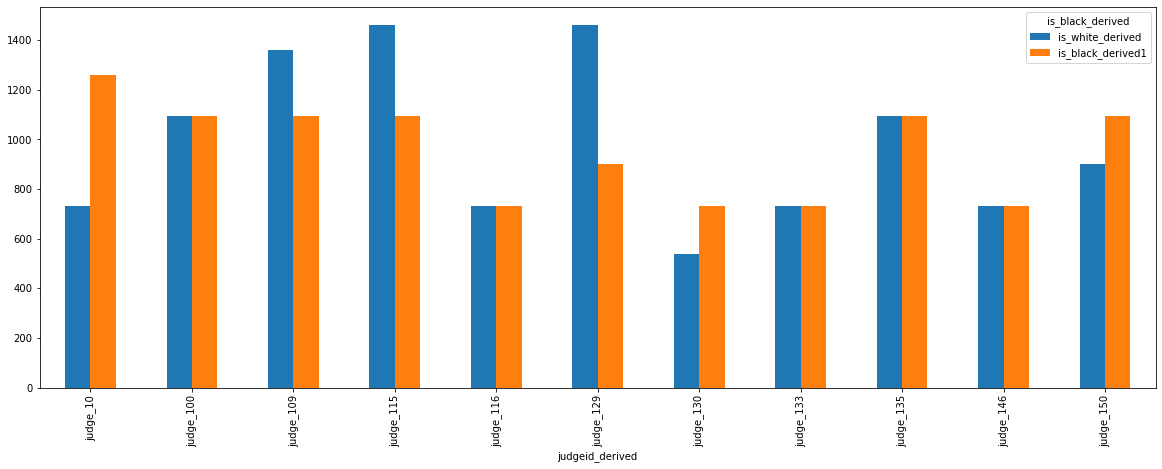

In [23]:
#df_g

dfjudge = df_g.groupby(["judgeid_derived","is_black_derived","is_white_derived"])["senlength_derived"].count()

dfjudge=dfjudge.reset_index()

print(dfjudge.shape)

dftemp7 = dfjudge[((dfjudge["senlength_derived"]>20) & (dfjudge["is_black_derived"]==True)) | (dfjudge["senlength_derived"]>20) & (dfjudge["is_white_derived"]==True)]

dftemp8 = dftemp7.groupby(["judgeid_derived"])["senlength_derived"].count().reset_index()

dftemp9 = dftemp8[dftemp8["senlength_derived"]>1]
judges = list(dftemp9["judgeid_derived"].values)

df_plot = df_g.groupby(["judgeid_derived","is_black_derived","is_white_derived"])["senlength_derived"].median().reset_index()

df_plot= df_plot[df_plot["judgeid_derived"].isin(judges)]

#df_plot

df_plotfinal = df_plot.pivot(index=['judgeid_derived'], columns='is_black_derived', values='senlength_derived').reset_index().reset_index(drop=True)


df_plotfinal.rename(columns = {False:'is_white_derived',True:'is_black_derived1'}, inplace= True)
#df_plotfinal



df_plotfinal[["judgeid_derived","is_white_derived","is_black_derived1"]].loc[0:10].set_index("judgeid_derived").plot(kind='bar',figsize=(20,7))

plt.show()
